In [3]:
import pandas as pd

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')



df["Sleep Disorder"]=df["Sleep Disorder"].fillna("None")

df = df.sample(frac=1, random_state=42)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
329,330,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,None
33,34,Male,31,Doctor,6.1,6,30,8,Normal,125/80,72,5000,None
15,16,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,None
325,326,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,None
57,58,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,None


In [4]:
df[["HighBP","LowBP"]]=df["Blood Pressure"].str.split('/', expand=True).astype(int)
df = df.drop(["Blood Pressure"], axis=1)

In [5]:
import seaborn as sns
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split

#Fixings warnings
import warnings
warnings.filterwarnings('ignore')

fig=px.histogram(df,x='Sleep Disorder',
                 barmode="group",color='Sleep Disorder',
                 color_discrete_sequence=['black','blue','light blue'],
                 text_auto=True)


fig.update_layout(title='<b>Distribution of persons have sleep disorder or not</b>..',
                 title_font={'size':18},
                 showlegend=True)


fig.update_yaxes(showgrid=False)

fig.show()

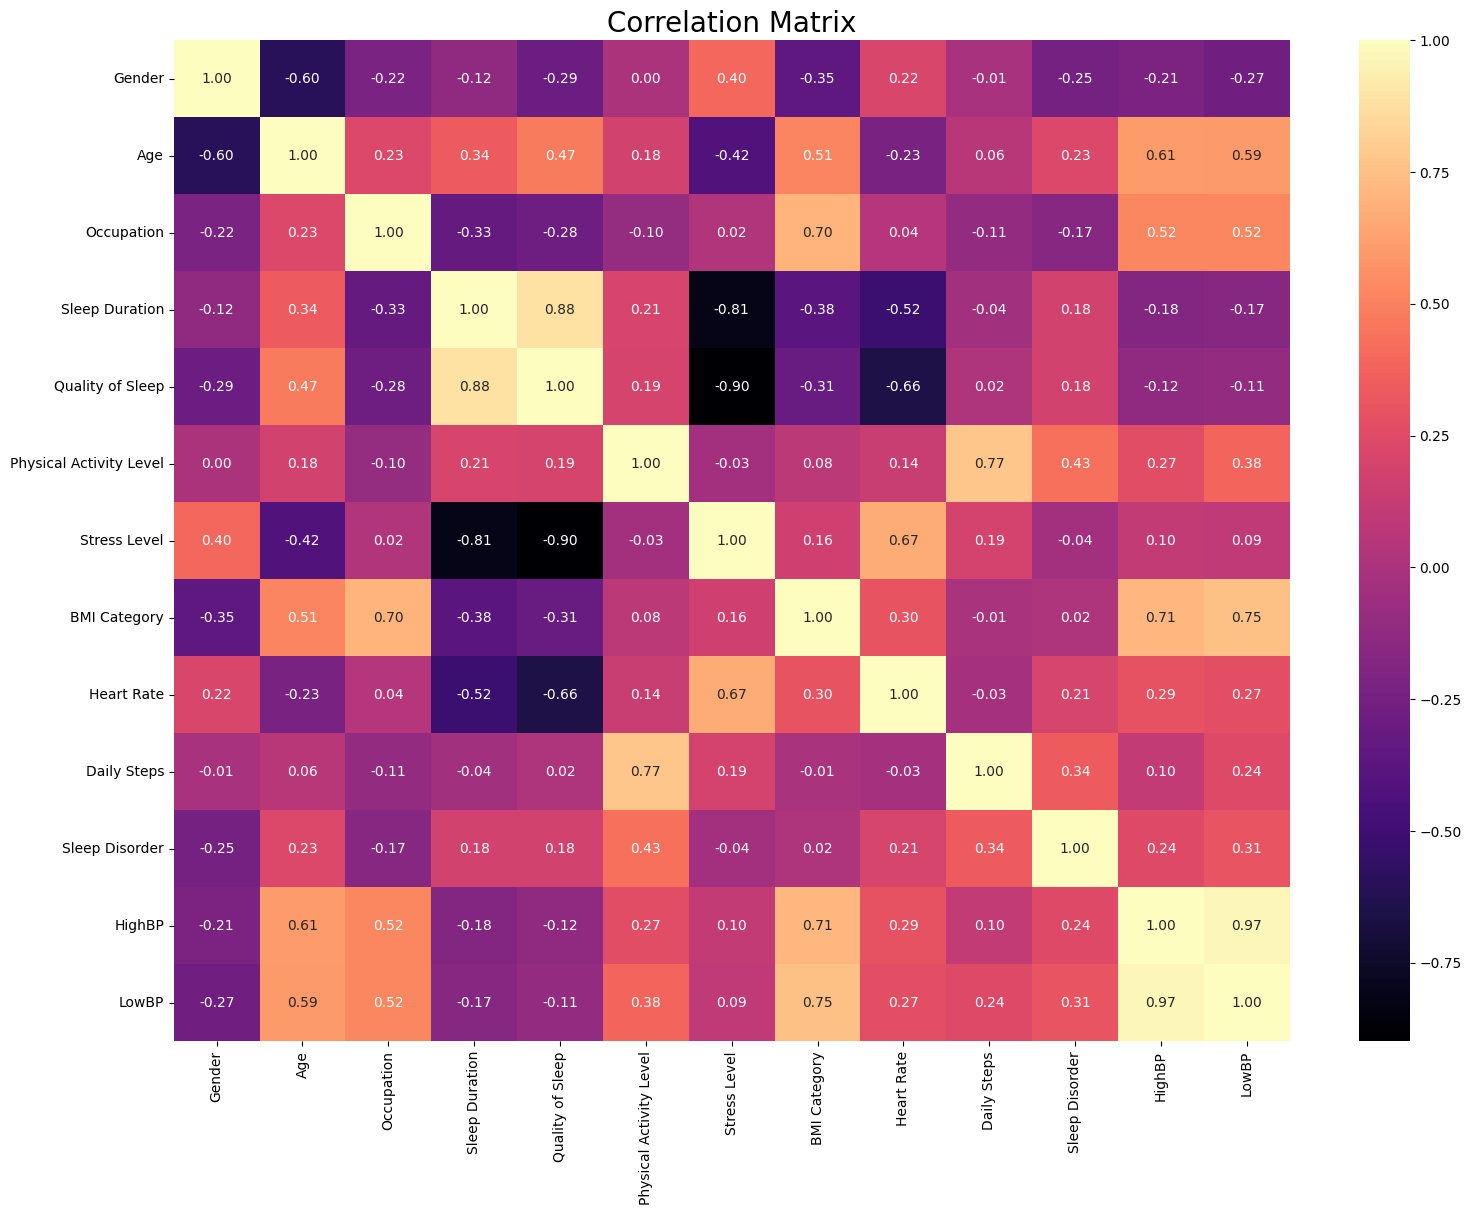

In [6]:
from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers
LE=LabelEncoder()


# df["Age"]=pd.cut(df["Age"],3)
# df["Heart Rate"]=pd.cut(df["Heart Rate"],4)
# df["Daily Steps"]=pd.cut(df["Daily Steps"],5)
# df["Sleep Duration"]=pd.cut(df["Sleep Duration"],4)
# df["Physical Activity Level"]=pd.cut(df["Physical Activity Level"],4)

categories=['Gender','Occupation','BMI Category','Sleep Disorder']
for label in categories:
    df[label]=LE.fit_transform(df[label])



# df['Blood Pressure']=df['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)

df.drop(['Person ID'], axis=1, inplace=True)

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [7]:
y_df = df["Sleep Disorder"]
x_df = df.drop(["Sleep Disorder"], axis=1)

print(y_df)

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X,Y = smote.fit_resample(x_df,y_df)

329    1
33     1
15     1
325    1
57     1
      ..
71     1
106    1
270    2
348    2
102    1
Name: Sleep Disorder, Length: 374, dtype: int64


In [8]:

X.to_csv("X.csv", index=False)
Y.to_csv("Y.csv", index=False)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.30, random_state=17)


Accuracy: 0.9381
Recall: 0.9381
Precision: 0.9381
F1: 0.9381
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.96      0.96      0.96        78
           2       0.82      0.82      0.82        17

    accuracy                           0.94       113
   macro avg       0.91      0.91      0.91       113
weighted avg       0.94      0.94      0.94       113



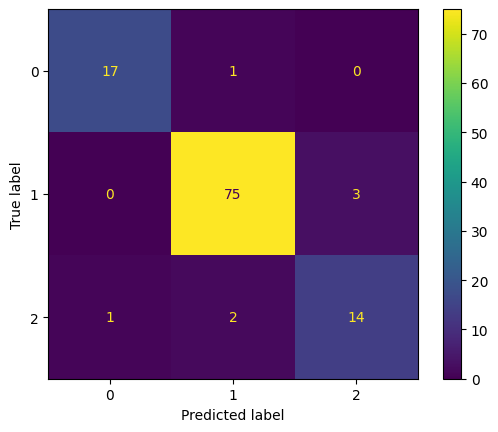

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

rf_model = RandomForestClassifier(random_state=17).fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


print(f"Accuracy: {round(accuracy_score(y_pred_rf, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred_rf,y_test,average='weighted'),4)}")
print(f"Precision: {round(precision_score(y_pred_rf,y_test,average='weighted'), 4)}")
print(f"F1: {round(f1_score(y_pred_rf,y_test,average='weighted'), 4)}")
print(classification_report(y_pred_rf, y_test))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred_rf)).plot()
plt.show()

Accuracy: 0.9343
Recall: 0.9343
Precision: 0.9361
F1: 0.9334
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.96      0.85      0.90        65
           2       0.92      0.98      0.95        66

    accuracy                           0.93       198
   macro avg       0.94      0.93      0.93       198
weighted avg       0.94      0.93      0.93       198



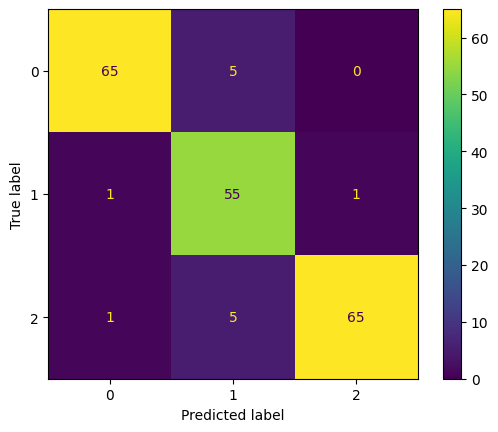

In [11]:
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X, Y, test_size=0.30, random_state=17)


rf_model_S = RandomForestClassifier(random_state=17).fit(X_train_SMOTE, y_train_SMOTE)
y_pred_rf_S = rf_model.predict(X_test_SMOTE)


print(f"Accuracy: {round(accuracy_score(y_pred_rf_S, y_test_SMOTE), 4)}")
print(f"Recall: {round(recall_score(y_pred_rf_S,y_test_SMOTE,average='weighted'),4)}")
print(f"Precision: {round(precision_score(y_pred_rf_S,y_test_SMOTE,average='weighted'), 4)}")
print(f"F1: {round(f1_score(y_pred_rf_S,y_test_SMOTE,average='weighted'), 4)}")
print(classification_report(y_pred_rf_S, y_test_SMOTE))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_SMOTE,y_pred_rf_S)).plot()
plt.show()

In [12]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

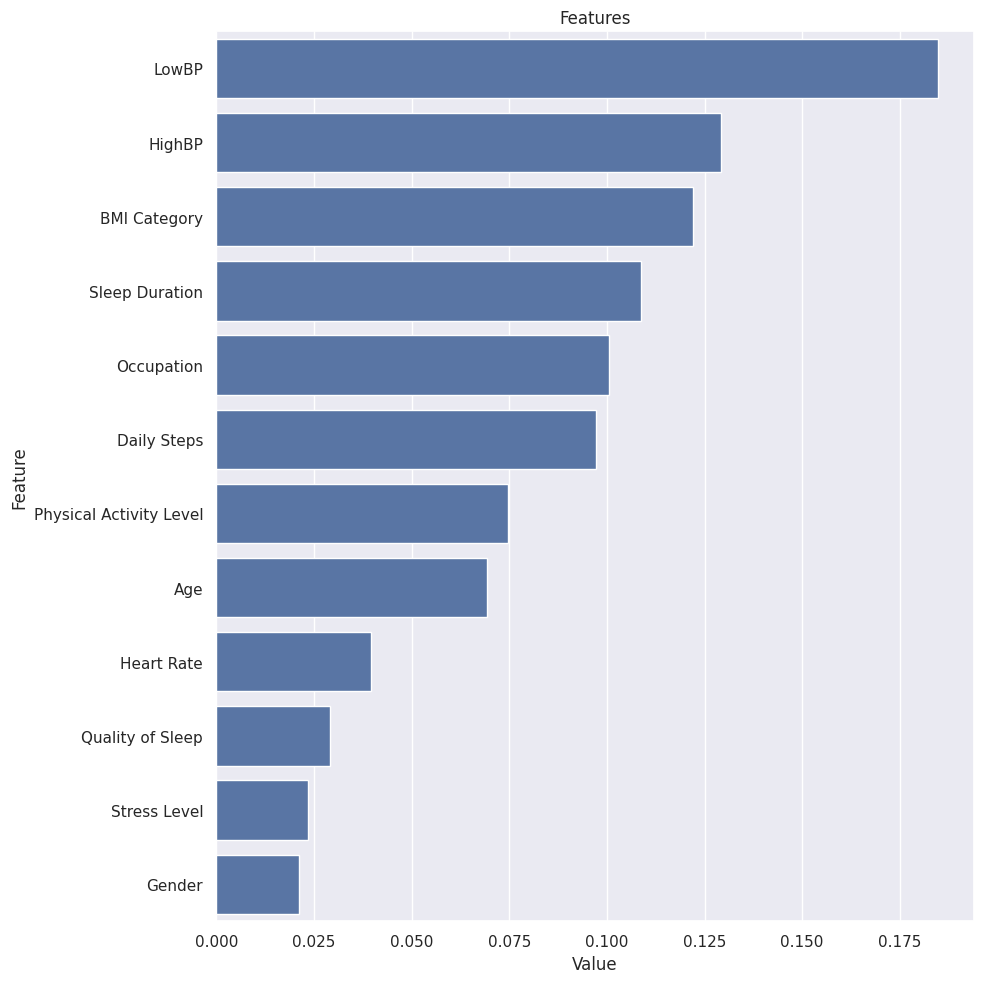

In [13]:
plot_importance(rf_model_S, X)

In [14]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=17).fit(X_train_SMOTE, y_train_SMOTE)
xgb_y_pred=xgb.predict(X_test_SMOTE)

Accuracy: 0.9646
Recall: 0.9646
Precision: 0.9652
F1: 0.9644
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.92      0.95        61
           2       0.96      0.99      0.97        69

    accuracy                           0.96       198
   macro avg       0.97      0.96      0.96       198
weighted avg       0.97      0.96      0.96       198



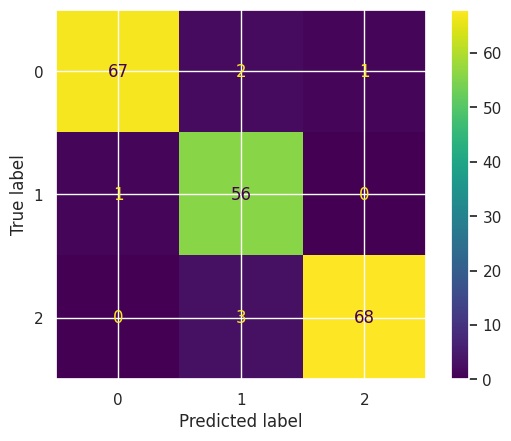

In [15]:
print(f"Accuracy: {round(accuracy_score(xgb_y_pred, y_test_SMOTE), 4)}")
print(f"Recall: {round(recall_score(xgb_y_pred,y_test_SMOTE,average='weighted'),4)}")
print(f"Precision: {round(precision_score(xgb_y_pred,y_test_SMOTE,average='weighted'), 4)}")
print(f"F1: {round(f1_score(xgb_y_pred,y_test_SMOTE,average='weighted'), 4)}")
print(classification_report(xgb_y_pred, y_test_SMOTE))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_SMOTE,xgb_y_pred)).plot()
plt.show()

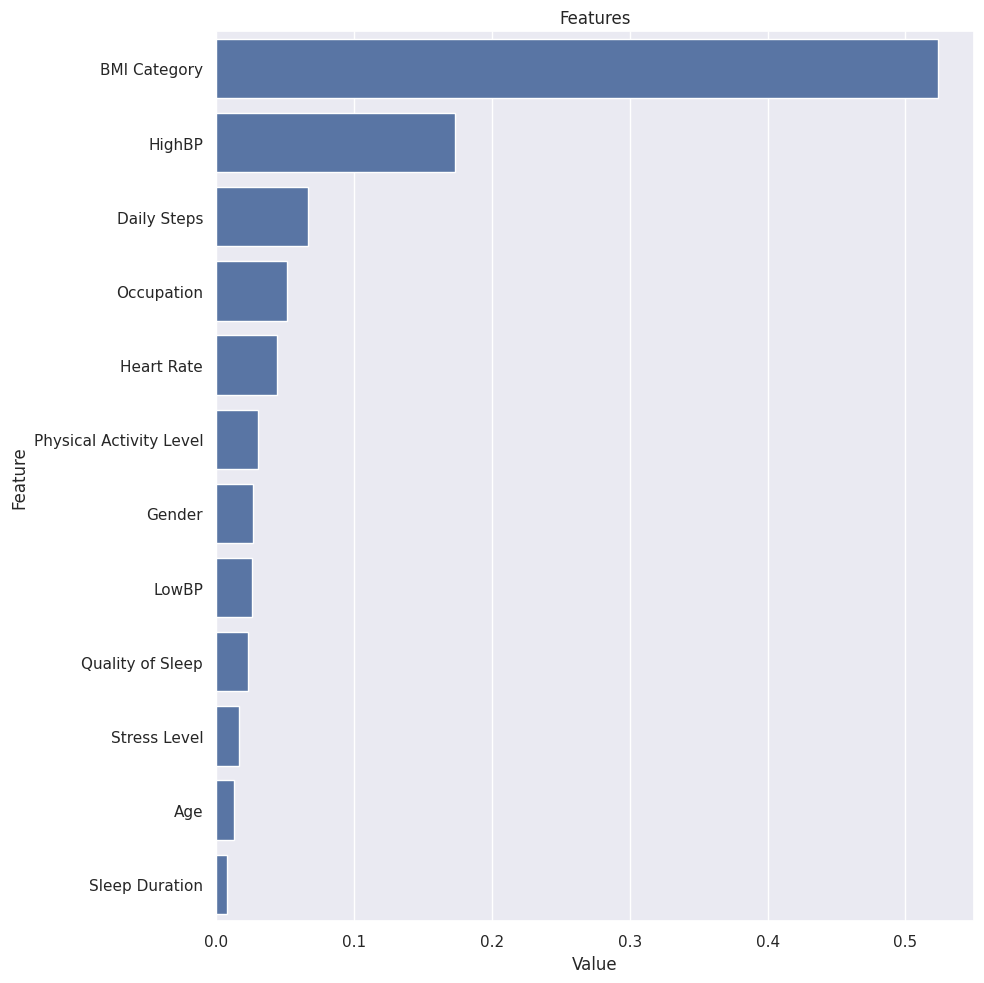

In [16]:
plot_importance(xgb, X)

In [23]:
from sklearn.model_selection import GridSearchCV, KFold
models = {"Random Forest":rf_model_S,"XGBoost":xgb}
param_grids = {
    "Random Forest": {"n_estimators": [10, 20, 50, 100]},
    "XGBoost": {"max_iter": [10, 20, 50, 100, 300, 500,1000]},
}
cv = KFold(n_splits=10, shuffle=True, random_state=0)

results = []
for name, model in models.items():
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        return_train_score=True,
        cv=cv,
    ).fit(X, Y)
    result = {"model": name, "cv_results": pd.DataFrame(grid_search.cv_results_)}
    results.append(result)


In [24]:
import plotly.colors as colors
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=True,
    subplot_titles=["Train time vs score", "Predict time vs score"],
)
model_names = [result["model"] for result in results]
colors_list = colors.qualitative.Plotly * (
    len(model_names) // len(colors.qualitative.Plotly) + 1
)

for idx, result in enumerate(results):
    cv_results = result["cv_results"].round(3)
    model_name = result["model"]
    param_name = list(param_grids[model_name].keys())[0]
    cv_results[param_name] = cv_results["param_" + param_name]
    cv_results["model"] = model_name

    scatter_fig = px.scatter(
        cv_results,
        x="mean_fit_time",
        y="mean_test_score",
        error_x="std_fit_time",
        error_y="std_test_score",
        hover_data=param_name,
        color="model",
    )
    line_fig = px.line(
        cv_results,
        x="mean_fit_time",
        y="mean_test_score",
    )

    scatter_trace = scatter_fig["data"][0]
    line_trace = line_fig["data"][0]
    scatter_trace.update(marker=dict(color=colors_list[idx]))
    line_trace.update(line=dict(color=colors_list[idx]))
    fig.add_trace(scatter_trace, row=1, col=1)
    fig.add_trace(line_trace, row=1, col=1)

    scatter_fig = px.scatter(
        cv_results,
        x="mean_score_time",
        y="mean_test_score",
        error_x="std_score_time",
        error_y="std_test_score",
        hover_data=param_name,
    )
    line_fig = px.line(
        cv_results,
        x="mean_score_time",
        y="mean_test_score",
    )

    scatter_trace = scatter_fig["data"][0]
    line_trace = line_fig["data"][0]
    scatter_trace.update(marker=dict(color=colors_list[idx]))
    line_trace.update(line=dict(color=colors_list[idx]))
    fig.add_trace(scatter_trace, row=1, col=2)
    fig.add_trace(line_trace, row=1, col=2)

fig.update_layout(
    xaxis=dict(title="Train time (s) - lower is better"),
    yaxis=dict(title="Test R2 score - higher is better"),
    xaxis2=dict(title="Predict time (s) - lower is better"),
    legend=dict(x=0.72, y=0.05, traceorder="normal", borderwidth=1),
    title=dict(x=0.5, text="Speed-score trade-off of tree-based ensembles"),
)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,CategoryEncoding

layer = CategoryEncoding(num_tokens=3, output_mode="one_hot")
y_train_SMOTE = layer(y_train_SMOTE)
y_test_SMOTE = layer(y_test_SMOTE)
y_train = layer(y_train)

In [26]:
model_NN = Sequential()
model_NN.add(Dense(12, activation='relu'))
model_NN.add(Dense(8, activation='relu'))
model_NN.add(Dense(3, activation='sigmoid'))

model_NN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_NN.fit(X_train_SMOTE, y_train_SMOTE, epochs=250, batch_size=24, verbose=2)

Epoch 1/250
20/20 - 3s - loss: 1419.3572 - accuracy: 0.3246 - 3s/epoch - 125ms/step
Epoch 2/250
20/20 - 0s - loss: 1040.9471 - accuracy: 0.3246 - 66ms/epoch - 3ms/step
Epoch 3/250
20/20 - 0s - loss: 735.4087 - accuracy: 0.3246 - 68ms/epoch - 3ms/step
Epoch 4/250
20/20 - 0s - loss: 541.4538 - accuracy: 0.3246 - 74ms/epoch - 4ms/step
Epoch 5/250
20/20 - 0s - loss: 405.4470 - accuracy: 0.3159 - 56ms/epoch - 3ms/step
Epoch 6/250
20/20 - 0s - loss: 290.2745 - accuracy: 0.3290 - 59ms/epoch - 3ms/step
Epoch 7/250
20/20 - 0s - loss: 191.0102 - accuracy: 0.3595 - 52ms/epoch - 3ms/step
Epoch 8/250
20/20 - 0s - loss: 95.7533 - accuracy: 0.3312 - 60ms/epoch - 3ms/step
Epoch 9/250
20/20 - 0s - loss: 13.4764 - accuracy: 0.3617 - 84ms/epoch - 4ms/step
Epoch 10/250
20/20 - 0s - loss: 5.0087 - accuracy: 0.3769 - 54ms/epoch - 3ms/step
Epoch 11/250
20/20 - 0s - loss: 2.8480 - accuracy: 0.4074 - 51ms/epoch - 3ms/step
Epoch 12/250
20/20 - 0s - loss: 1.6059 - accuracy: 0.4684 - 83ms/epoch - 4ms/step
Epoch 1

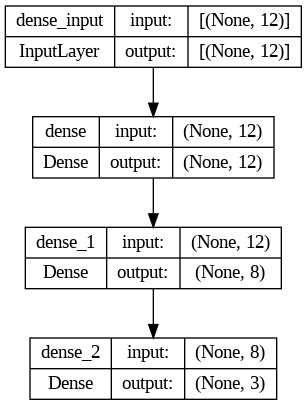

In [31]:
from keras.utils import plot_model
plot_model(model_NN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

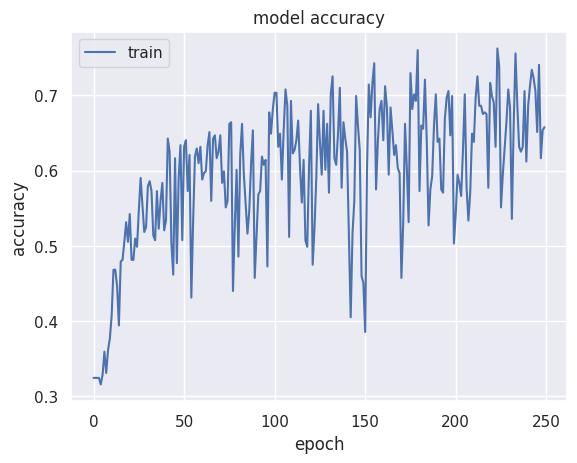

In [34]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

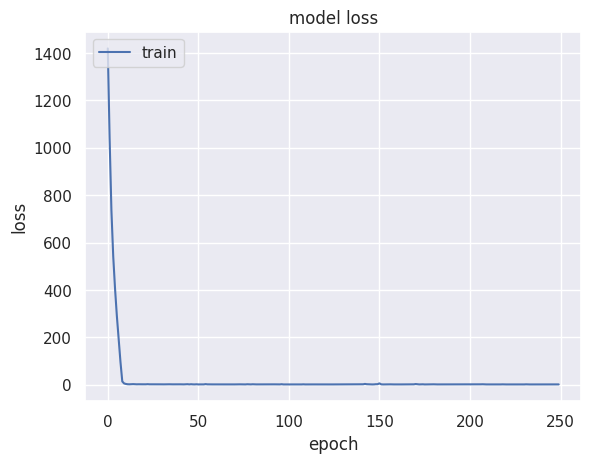

In [33]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
_,accuracy = model_NN.evaluate(X_test_SMOTE,y_test_SMOTE)
print(accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 1.0517 - accuracy: 0.5556
0.5555555820465088
